<a href="https://colab.research.google.com/github/kgorfu/MyCode/blob/master/Kaleab_TRAIN_AWS_P1_Lab_4_%5BPractice%5D_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #4 : Review and Titanic Project**
---

### **Description**
In this lab, you will hone and apply your skills through review and your first official project, particularly working with the Titanic dataset.


<br>

### **Lab Structure**

**Part 0**: [Review](#p0)
> **Part 0.1**: [Data Cleaning](#p01)

> **Part 0.2**: [Feature Engineering and Selection](#p02)

> **Part 0.3**: [Data Visualization](#p03)


#### **[Titanic Project](#tp)**

**Part 1**: [Data Cleaning](#p1)

**Part 2**: [Feature Engineering](#p2)
> **Part 2.1**: [Feature Creation](#p21)

> **Part 2.2**: [Feature Encoding](#p22)

**Part 3**: [EDA and Visualization](#p3)



<br>

### **Goals**
By the end of this lab, you will:
* Be comfortable using pandas to clean data.
* Understand how to engineer features to better represent characteristics of the data.
* Know how to use visualizations to study trends in the data.
* Understand what role different factors (features) played in the survival of passengers aboard the Titanic.

<br>

### **Cheat Sheets**
* [Pandas Commands](https://docs.google.com/document/d/1v-MZCgoZJGRcK-69OOu5fYhm58x2G0JUWyi2H53j8Ls/edit)

* [Feature Engineering and Selection with Pandas](https://docs.google.com/document/d/191CH-X6zf4lESuThrdIGH6ovzpHK6nb9NRlqSIl30Ig/edit?usp=sharing)

* [Data Visualizations](https://docs.google.com/document/d/1EC3tTjRRL5ruNjc1n8UmJNGvN82_S-7rx7LLkMvv1Qk/edit?usp=share_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries as well as today's datasets.**


In [4]:
!pip install --upgrade pandas
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

#data = pd.read_csv("https://raw.githubusercontent.com/n-sachdeva/titanic/main/titanic.csv")
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


<a name="p0"></a>

---
## **Part 0: Review [OPTIONAL]**
---

This section contains optional review problems for the topics we have learned so far. You can use these to prepare for the project below or at a later time to brush up on these topics. In particular, this will look at a dataset containing the top 1000 movies according to the Internet Movie Database (IMDB).

In [5]:
print(movie_df.shape)
movie_df.tail()

(1007, 13)


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1002,Breakfast at Tiffany's,1961,115.0,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835
1003,Giant,1956,201.0,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224
1004,From Here to Eternity,1953,118.0,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
1005,Lifeboat,1944,97.0,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424
1006,The 39 Steps,1935,86.0,Crime,7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,30500200


<a name="p01"></a>

---
### **Part 0.1: Data Cleaning**
---

#### **Exercise #1: Remove duplicates using `drop_duplicates()`.**
---

In [6]:
print(movie_df.shape)
movie_df.drop_duplicates()   # COMPLETE THIS LINE
print(movie_df.shape)

(1007, 13)
(1007, 13)


#### **Exercise #2: Drop specific columns.**
---

Drop the following columns: `Star3` and `Star4`.

In [7]:
movie_df = movie_df.drop(['Star3','Star4'], axis = 1) # COMPLETE THIS LINE
movie_df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469
1,The Godfather,1972,175.0,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411
2,The Dark Knight,2008,152.0,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,2303232,534858444
3,The Godfather: Part II,1974,202.0,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000
4,12 Angry Men,1957,96.0,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000


#### **Exercise #3: Fill missing values.**
---

Fill missing values in the `Runtime` column with the most frequent value (mean).


In [8]:
print(movie_df['Runtime'].isnull().iloc[500:505])   #504     True
mean_runtime = movie_df['Runtime'].mean() # COMPLETE THIS LINE].mean()[0]
# COMPLETE THIS CODE
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)
print(movie_df['Runtime'].isnull().iloc[500:505])   #504     True

500    False
501    False
502    False
503    False
504     True
Name: Runtime, dtype: bool
500    False
501    False
502    False
503    False
504    False
Name: Runtime, dtype: bool


#### **Exercise #4: Rename the `Runtime` column to `Runtime (min)`.**
---


In [9]:
# COMPLETE THIS CODE
print(movie_df.head())
movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df.head()

               Series_Title  Released_Year  Runtime   Genre  IMDB_Rating  \
0  The Shawshank Redemption           1994    142.0   Drama          9.3   
1             The Godfather           1972    175.0   Crime          9.2   
2           The Dark Knight           2008    152.0  Action          9.0   
3    The Godfather: Part II           1974    202.0   Crime          9.0   
4              12 Angry Men           1957     96.0   Crime          9.0   

                                            Overview              Director  \
0  Two imprisoned men bond over a number of years...        Frank Darabont   
1  An organized crime dynasty's aging patriarch t...  Francis Ford Coppola   
2  When the menace known as the Joker wreaks havo...     Christopher Nolan   
3  The early life and career of Vito Corleone in ...  Francis Ford Coppola   
4  A jury holdout attempts to prevent a miscarria...          Sidney Lumet   

            Star1           Star2  No_of_Votes      Gross  
0     Tim Robb

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469
1,The Godfather,1972,175.0,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411
2,The Dark Knight,2008,152.0,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,2303232,534858444
3,The Godfather: Part II,1974,202.0,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000
4,12 Angry Men,1957,96.0,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000


#### **Exercise #5: Change the data type of `Runtime (min)` to `'int64'`.**
---


In [10]:
# COMPLETE THIS CODE
print(movie_df.dtypes)
movie_df = movie_df.astype({"Runtime (min)": "int64"})
movie_df.dtypes

Series_Title      object
Released_Year      int64
Runtime (min)    float64
Genre             object
IMDB_Rating      float64
Overview          object
Director          object
Star1             object
Star2             object
No_of_Votes        int64
Gross              int64
dtype: object


,0
Series_Title,object
Released_Year,int64
Runtime (min),int64
Genre,object
IMDB_Rating,float64
Overview,object
Director,object
Star1,object
Star2,object
No_of_Votes,int64


<a name="p02"></a>

---
### **Part 0.2: Feature Engineering and Selection**
---

**If you did not complete Part 0.1, then run the cell below before continuing.**

In [11]:
movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

KeyError: 'Runtime'

#### **Exercise #1: Create a new feature `Runtime (hr)`.**
---

Create new feature called `Runtime (hr)` that converts `Runtime (min)` to hours by dividing that data by 60.

In [12]:
movie_df['Runtime (hr)'] = movie_df['Runtime (min)']/60 # COMPLETE THIS LINE

In [13]:
movie_df.tail()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,No_of_Votes,Gross,Runtime (hr)
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,166544,1378835,1.916667
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,34075,13780224,3.350000
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,43374,30500000,1.966667
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,26471,13780424,1.616667
1006,The 39 Steps,1935,86,Crime,7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,Robert Donat,Madeleine Carroll,51853,30500200,1.433333


#### **Exercise #2: Create a new feature `Runtime (short, medium, long)`.**
---

Create new feature called `Runtime (short, medium, long)` that designates any movie with a runtime:
* Less than 90 minutes as 'short'.
* Between 90 and 120 minutes as 'medium'.
* Longer than 120 minutes as 'long'.

In [14]:
movie_df['Runtime (short, medium, long)'] = pd.cut(movie_df['Runtime (min)'], bins=[0, 90, 120, float('inf')], labels=['short', 'medium', 'long'])
movie_df.tail()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,No_of_Votes,Gross,Runtime (hr),"Runtime (short, medium, long)"
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,166544,1378835,1.916667,medium
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,34075,13780224,3.350000,long
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,43374,30500000,1.966667,medium
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,26471,13780424,1.616667,medium
1006,The 39 Steps,1935,86,Crime,7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,Robert Donat,Madeleine Carroll,51853,30500200,1.433333,short


In [15]:
def age_group(age):
    '''Mapper for AgeGroup'''
    if age < 18:
        return 'Child'
    elif age <= 65:
        return 'Adult'
    else:
        return 'Elderly'

In [ ]:
data['FamilySize']

#### **Exercise #3: Create a new feature `Dollar_Per_Hour`.**
---

Create new feature called `Dollar_Per_Hour` that stores the result of dividing `Gross` by `Runtime (hr)`.

In [16]:
# COMPLETE THIS CODE
movie_df['Dollar_Per_Hour'] = movie_df['Gross']/movie_df['Runtime (hr)']

#### **Exercise #4: Create an encoded version of the categorical feature `Genre`.**
---

Call the feature `Genre_Encoded`. You may find it necessary to use the pandas `unique()` function to find the unique genres to be encoded.

In [17]:
movie_df['Genre'].unique()

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

#### **Exercise #5: Select the 4 best features using `SelectKBest(...)` to predict the `IMDB_Rating`.**
---

**Run the cell below to organize the data into numerical features and a label.**

In [18]:
features = movie_df.select_dtypes('number')
features = features.drop(columns = 'IMDB_Rating')

label = movie_df['IMDB_Rating']
label.head()

,IMDB_Rating
0,9.3
1,9.2
2,9.0
3,9.0
4,9.0


In [22]:
feature_selector = SelectKBest(k=4)
feature_selector.fit_transform(features, label)

best_features = movie_df[feature_selector.get_feature_names_out()]

best_features

,Runtime (min),No_of_Votes,Gross,Runtime (hr)
0,142,2343110,28341469,2.366667
1,175,1620367,134966411,2.916667
2,152,2303232,534858444,2.533333
3,202,1129952,57300000,3.366667
4,96,689845,4360000,1.600000
...,...,...,...,...
1002,115,166544,1378835,1.916667
1003,201,34075,13780224,3.350000
1004,118,43374,30500000,1.966667
1005,97,26471,13780424,1.616667


<a name="p03"></a>

---
### **Part 0.3: Data Visualization**
---

**If you did not complete Part 0.1, then run the cell below before continuing.**

In [ ]:
movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

#### **Exercise #1: Create a scatterplot using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.**
---

Make sure to include a meaningful:
* Title, ex: `'Gross Money vs. Runtime'`.
* X-axis label including units `'min'`.
* Y-axis label including units `'USD'`.

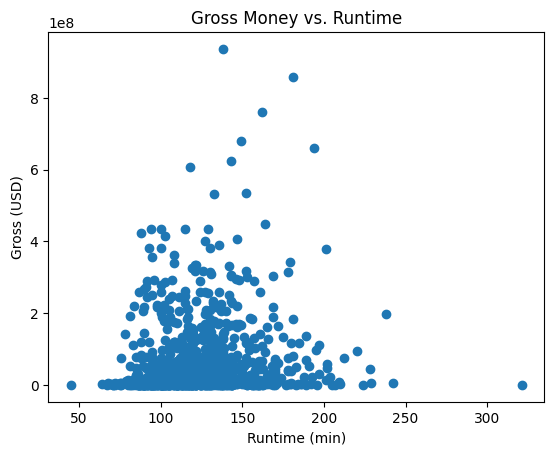

In [23]:
plt.scatter(movie_df['Runtime (min)'], movie_df['Gross'])
plt.title('Gross Money vs. Runtime')
plt.xlabel('Runtime (min)')
plt.ylabel('Gross (USD)')
plt.show()

#### **Exercise #2: Create a scatterplot using `Released_Year` as the x-axis value and `Runtime (min)` as the y-axis value.**
---

Make sure to include a meaningful:
* Title, ex: `'Runtime vs. Released_Year'`.
* X-axis label.
* Y-axis label including units `'min'`.

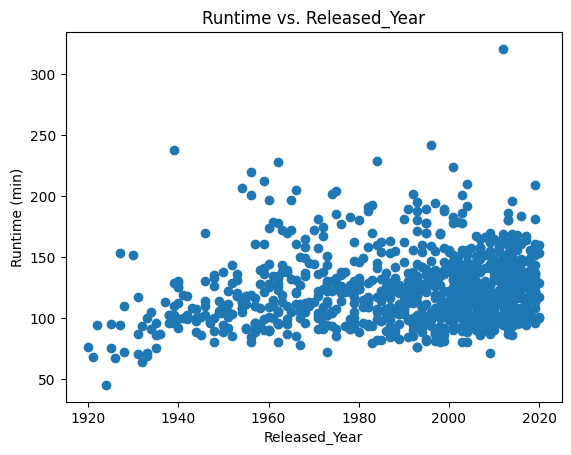

In [24]:
plt.scatter(movie_df['Released_Year'], movie_df['Runtime (min)'])
plt.title('Runtime vs. Released_Year')
plt.xlabel('Released_Year')
plt.ylabel('Runtime (min)')
plt.show()

#### **Exercise #3: Create a *lineplot* using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.**
---

Make sure to include a meaningful:
* Title, ex: `'Gross Money vs. Runtime'`.
* X-axis label including units `'min'`.
* Y-axis label including units `'USD'`.

<br>

**NOTE**: This is not going to be a particularly helpful graph (the scatter plot is a better choice), but we oftentimes can't know this ahead of time. A lot of EDA and Visualizations involves trying a number of things and seeing what helps.

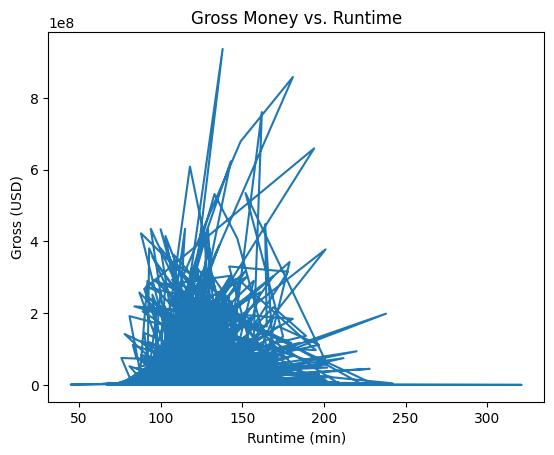

In [27]:
plt.plot(movie_df['Runtime (min)'], movie_df['Gross'])
plt.title('Gross Money vs. Runtime')
plt.xlabel('Runtime (min)')
plt.ylabel('Gross (USD)')
plt.show()

#### **Exercise #3: Create a *lineplot* using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.**
---

Make sure to include a meaningful:
* Title, ex: `'Gross Money vs. Runtime'`.
* X-axis label including units `'min'`.
* Y-axis label including units `'USD'`.

<br>

**NOTE**: This is not going to be a particularly helpful graph (the scatter plot is a better choice), but we oftentimes can't know this ahead of time. A lot of EDA and Visualizations involves trying a number of things and seeing what helps.

#### **Exercise #4: Create a *lineplot* using `Released_Year` as the x-axis value and `Average Gross in Year` as the y-axis value.**
---

Make sure to include a meaningful:
* Title, ex: `'Average Gross Money vs. Released Year'`.
* X-axis label.
* Y-axis label including units `'USD'`.

Text(0, 0.5, 'Average Gross (USD)')

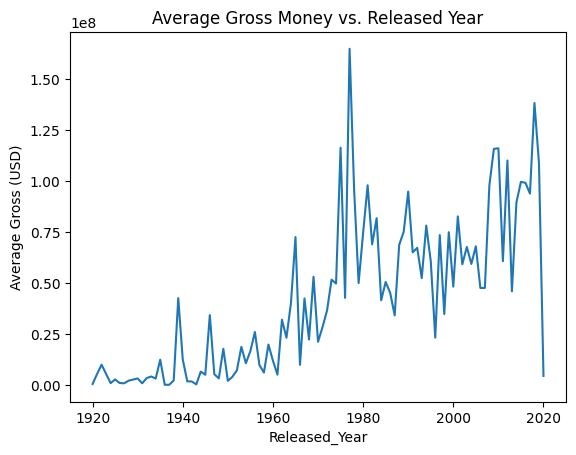

In [28]:
mean_gross = movie_df.groupby('Released_Year')['Gross'].mean()     # COMPLETE THIS LINE
plt.plot(mean_gross.index, mean_gross.values)
plt.title('Average Gross Money vs. Released Year')
plt.xlabel('Released_Year')
plt.ylabel('Average Gross (USD)')

#### **Exercise #5: Create a bar plot of the number of movies released per year**
---

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

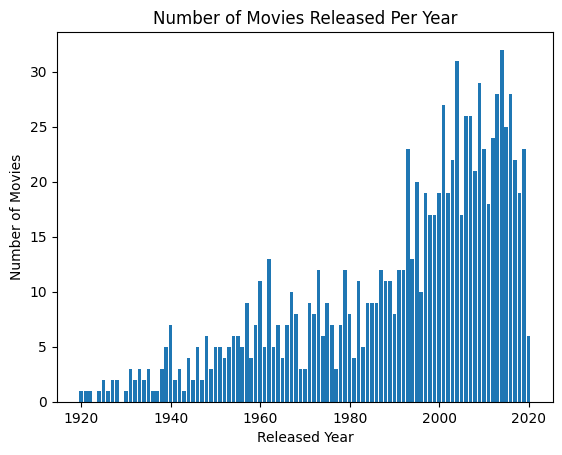

In [34]:
movies_per_year = movie_df['Released_Year'].value_counts()

plt.bar(movies_per_year.index, movies_per_year.values)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies')
plt.show()

#### **Exercise #6: Create a bar plot of the number of Dramas released per year**
---

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

<br>

**Hint**: Recall that you can use `.loc[CRITERIA, :]` to find all data matching given criteria and the example in Exercise #6 for finding the number of movies realeased per year.

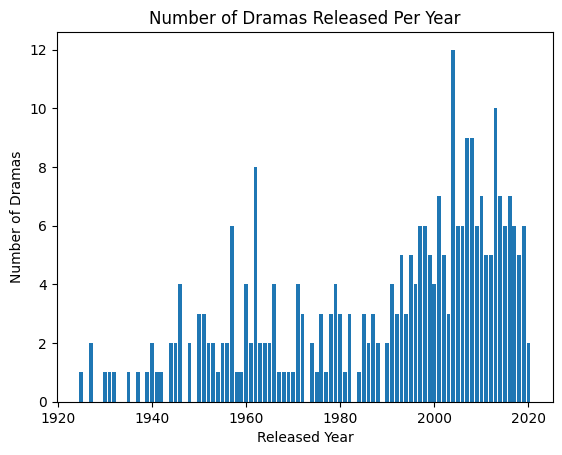

In [35]:
# COMPLETE THIS CODE
movies_per_year = movie_df.loc[movie_df['Genre'] == 'Drama', 'Released_Year'].value_counts()

plt.bar(movies_per_year.index, movies_per_year.values)
plt.title('Number of Dramas Released Per Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Dramas')
plt.show()

<a name="tp"></a>

---
# **Titanic Project**
---

In the following parts, you will hone and apply your skills to a famous dataset containing information about passengers on the Titanic and whether they survived or not: [Titanic dataset from Kaggle](https://www.kaggle.com/competitions/titanic/overview).


<br>

There are twelve columns in the dataset. The target column is `Survived` which designates if a passenger survived (1) or not (0). The features initially available are:

* `PassengerId`: Numeric, a unique number for each passenger.
* `Pclass`: Numeric, the ticket class.	1 = 1st, 2 = 2nd, 3 = 3rd.
* `Name`: Categorical, the name of the passenger.
* `Sex`: Categorical, the sex of the passenger.
* `Age`: Numeric, the passenger's age in years.
* `Sibsp`: Numeric, the number of siblings / spouses aboard the Titanic.
* `Parch`: Numeric, the number of parents / children aboard the Titanic.
* `Ticket`: Categorical, ticket number.
* `Fare`: Numeric, passenger fare.
* `Cabin`: Categorical, cabin number.
* `Embarked`: Categorical, port of embarkation.	C = Cherbourg, Q = Queenstown, S = Southampton.

<a name="p1"></a>

---
## **Part 1: Data Cleaning**
---

To help us decide how to clean our data, we will start with some *light* EDA. Then we will drop any duplicates and unnecessary columns and fill in any values as needed.

### **Exercise #1: Print the first 10 rows of the data.**

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#url = "https://github.com/pandas-dev/pandas/blob/main/doc/data/titanic.csv"
url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
titanic_df = pd.read_csv(url)
print(titanic_df.shape)
print(titanic_df.head(3))
titanic_df.tail(3)

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### **Exercise #2: Print a summary of the dataset.**

---

Next, let's check if we have any missing values using the `pandas` `info()` function.

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **General Questions To Think About**

At this point in the process, it's generally good to consider:

* Which columns contain missing values?
* Why might it not be a good idea to drop all rows with a missing value?
* For a numerical feature, what can you fill the missing values with?
* For a categorical feature, what can you fill the missing values with?
* Are there any columns will not be useful for the analysis? If so, why?


<br>

Now that we have some basic information on our dataset, let's do some data cleaning.

### **Exercise #3: Remove duplicates using `drop_duplicates()`.**
---

In [10]:
titanic_df.drop_duplicates(inplace=True)
titanic_df.shape

(891, 12)

### **Exercise #4: Drop unnecessary columns.**
---

Drop the following columns: `PassengerId`, `Name`, `Ticket`, and `Cabin`.

In [12]:
print(titanic_df.head(1))
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
titanic_df.head(1)

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


### **Exercise #5: Fill missing values.**
---

Fill missing values in the `Embarked` column with the most frequent value (mode).


In [16]:
print(titanic_df['Embarked'].value_counts())
most_frequent = titanic_df['Embarked'].mode()[0] # COMPLETE THIS CODE
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(most_frequent)
print(titanic_df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


### **Exercise #6: Fill missing values.**
---

Fill missing values in the `Age` column with the median value.


In [17]:
print(titanic_df['Age'].value_counts())
median_age = titanic_df['Age'].median() # COMPLETE THIS CODE
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)
print(titanic_df['Age'].value_counts())

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64


<a name="p2"></a>

---
## **Part 2: Feature Engineering**
---

Now that we have cleaned our data, we can move on to feature engineering. Specifically, we will create new relevant features and encode categorical ones.

<a name="p21"></a>

---
### **Part 2.1: Feature Creation**
---

#### **Exercise #1: Create a new feature `AgeGroup`.**
---

Create a new feature that designates anyone:
* Younger than 18 as `Child`.
* Between 18 and 65 as `Adult`.
* Over 65 as `Elderly`.

In [11]:
print(titanic_df['Age'].value_counts())
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 18, 65, float('inf')], labels=['Child', 'Adult', 'Elderly'])
titanic_df['AgeGroup'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


,count
AgeGroup,
Adult,567
Child,139
Elderly,8


#### **Exercise #2: Create a new feature `FareGroup`.**
---

Using `pd.qcut()`, divide fares into four buckets: `Cheap`, `Low`, `High`, `Expensive`.



In [24]:
print(titanic_df['Fare'].value_counts())
titanic_df['FareGroup'] = pd.qcut(titanic_df['Fare'], q=4, labels=['Cheap', 'Low', 'High', 'Expensive'])
titanic_df['FareGroup'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


,count
FareGroup,
Low,224
Cheap,223
High,222
Expensive,222


#### **Exercise #3: Create a new feature `FamilySize`.**
---

Create a new feature by adding the columns `Sibsp` and `Parch` and including the ticket-holder themselves.


In [22]:
print(titanic_df['SibSp'].value_counts())
print(titanic_df['Parch'].value_counts())
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['FamilySize'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


,count
FamilySize,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


<a name="p22"></a>

---
### **Part 2.2: Feature Encoding**
---

We need to convert categorical variables to numerical ones. We will use the approach you learned yesterday: label encoding.

#### **Exercise #1: Create an encoded version of the categorical feature `Sex`.**

In [10]:
# Define the mapping of labels to integers
label_map = {'male':0, 'female':1}

# COMPLETE THIS LINE

# Use the map() function to replace the labels with their corresponding integers
titanic_df['Sex_encoded'] = titanic_df['Sex'].map(label_map) # COMPLETE THIS LINE

In [8]:
titanic_df['Sex_encoded'].value_counts()

,count
Sex_encoded,
0,577
1,314


In [12]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 18, 65, float('inf')], labels=['Child', 'Adult', 'Elderly'])
age_encoding = dict(map(reversed, enumerate(set(titanic_df['AgeGroup'].unique()))))
titanic_df['AgeGroup_encoded'] = titanic_df['AgeGroup'].map(age_encoding)
titanic_df['AgeGroup_encoded'].value_counts()
titanic_df['AgeGroup'].unique()

['Adult', NaN, 'Child', 'Elderly']
Categories (3, object): ['Child' < 'Adult' < 'Elderly']

#### **Exercise #2: Create an encoded version of the categorical feature `AgeGroup`.**

In [12]:
# Define the mapping of labels to integers
age_map = {'Child':0, 'Adult':1, 'Elderly':2} # COMPLETE THIS LINE

# Use the map() function to replace the labels with their corresponding integers
titanic_df['AgeGroup_encoded'] = titanic_df['AgeGroup'].map(age_map) # COMPLETE THIS LINE
print(titanic_df['AgeGroup'].value_counts())
titanic_df['AgeGroup_encoded'].value_counts()

AgeGroup
Adult      567
Child      139
Elderly      8
Name: count, dtype: int64


,count
AgeGroup_encoded,
1,567
0,139
2,8


#### **Exercise #3: Create an encoded version of the categorical feature `FareGroup`.**

In [29]:
fare_map = {'Cheap':0, 'Low':1, 'High':2, 'Expensive':3} # COMPLETE THIS LINE
titanic_df['FareGroup_encoded'] = titanic_df['FareGroup'].map(fare_map) # COMPLETE THIS CODE
print(titanic_df['FareGroup'].value_counts())
titanic_df['FareGroup_encoded'].value_counts()

FareGroup
Low          224
Cheap        223
High         222
Expensive    222
Name: count, dtype: int64


,count
FareGroup_encoded,
1,224
0,223
2,222
3,222


#### **Exercise #4: Create an encoded version of the categorical feature `Embarked`.**

In [30]:
# COMPLETE THIS CODE
embarked_map = {'S':0, 'C':1, 'Q':2}
titanic_df['Embarked_encoded'] = titanic_df['Embarked'].map(embarked_map)
print(titanic_df['Embarked'].value_counts())
titanic_df['Embarked_encoded'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


,count
Embarked_encoded,
0.0,644
1.0,168
2.0,77


<a name="p3"></a>

---
## **Part 3: EDA and Visualization**
---

In this section, we will explore and visualize the data to gain insight into what factors contribute to a passenger's survival.

<br>

**NOTE**: Because we will eventually use this data to build ML models, it is necessary to split the data into a training and validation set *before* we do EDA. Not doing so is an example of how data leakage can occur.

We can split the dataframe in `pandas` using the `sample()` function. **You do not need to remember this.**

<br>

**Run the code below to split the dataset.**

In [3]:
train = titanic_df.sample(frac = 0.8)

# Creating dataframe with the remaining 20%
validation = titanic_df.drop(train.index)

**It is vital that we only use the `train` data for the EDA below.**

### **Exercise #1: Create a bar plot that shows passenger counts by gender.**

---

**Hint:** Use `value_counts()`.

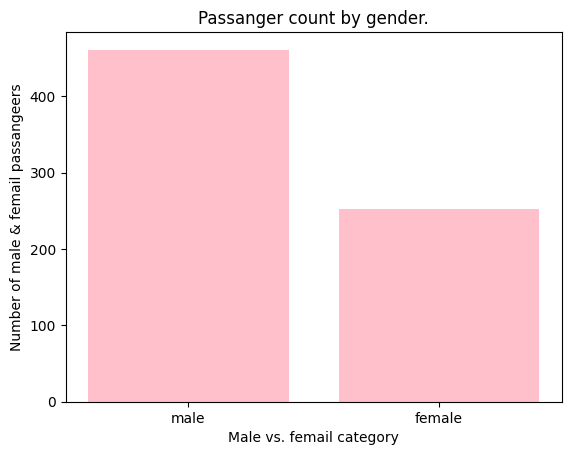

In [4]:
mf_counts = train['Sex'].value_counts() # COMPLETE THIS LINE
plt.bar(mf_counts.index, mf_counts.values, color = 'pink') # removed color = blue

plt.title('Passanger count by gender.')  # COMPLETE THIS LINE
plt.xlabel('Male vs. femail category') # COMPLETE THIS LINE
plt.ylabel('Number of male & femail passangeers')# COMPLETE THIS LINE
plt.show()

### **Exercise #2: Use `groupby()` to get the survival rate of passengers grouped by age.**

---

Use `AgeGroup` as the input to `groupby`, then aggregate `Survived` by mean.

In [5]:
grouped_by_age = train.groupby(train['Age']) # COMPLETE THIS LINE
grouped_by_age['Survived'].mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
65.00,0.0
70.00,0.0
70.50,0.0


### **Exercise #3: Make a scatter plot of `Age` vs. `Fare`.**

---

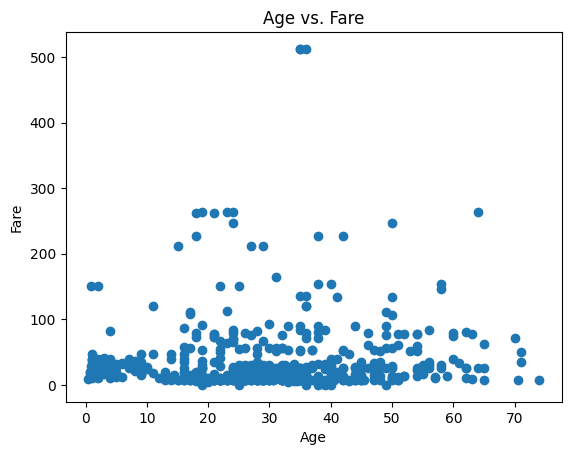

In [6]:
plt.scatter(train['Age'], train['Fare'])
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### **Define the `plot_survival(column)` function.**

---

To wrap up, you will need to answer several questions about this dataset using your work above, what you have learned about pandas and matplotlib, and a plotting function we've defined below.

<br>

This function, `plot_survival(column)` makes bar plots of survival rates and counts of any categorical variable passed in as `column`.

**Run the code below to define this plotting function.**

In [7]:
def plot_survival(column):
  survival_rate = train.groupby(column)['Survived'].mean()

  # create a bar plot for survival rate
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
  ax1.bar(x=survival_rate.index, height=survival_rate.values, color=['tab:blue'])
  ax1.set_ylabel('Survival rate')
  ax1.set_xlabel(column)

  # create a count plot for a given column
  counts = train.groupby([column, 'Survived']).size().unstack()
  width = 0.5
  x = counts.index
  survived = counts[1]
  not_survived = counts[0]
  ax2.bar(x, survived, width, label='Survived', color='tab:blue')
  ax2.bar(x, not_survived, width, bottom=survived, label='Not Survived', color='tab:orange')

  # set the labels and legend
  ax2.set_ylabel('Counts')
  ax2.set_xlabel(column)
  ax2.legend()
  plt.show()

Below is an example of how to use the function. Run the cell below to plot survival by age group.

<ipython-input-7-f47115d14767>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = train.groupby(column)['Survived'].mean()
<ipython-input-7-f47115d14767>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = train.groupby([column, 'Survived']).size().unstack()


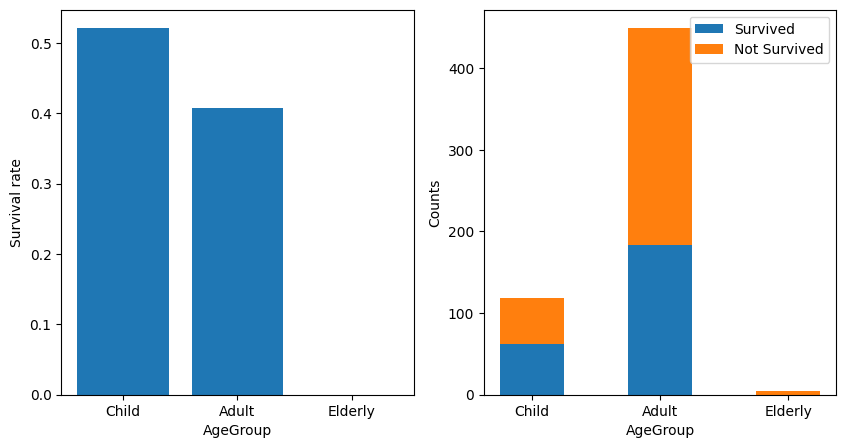

In [14]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 18, 65, float('inf')], labels=['Child', 'Adult', 'Elderly'])
plot_survival('AgeGroup')

### **Question #1: How many passengers survived vs. didn't survive?**

---

**Hint**: This is a matter of *counting* how many *values* of the `Survived` column are 0 (didn't survive) vs. 1 (did survive).

<Axes: xlabel='Survived'>

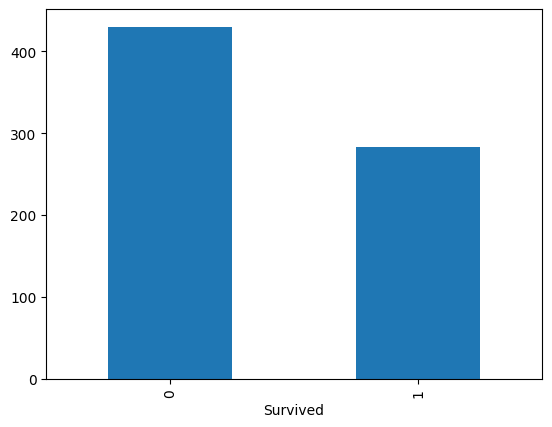

In [17]:
train['Survived'].value_counts()
train['Survived'].value_counts().plot(kind='bar')

### **Question #2: How did passenger class affect survival rates?**

---

**Hint**: This is the kind of question that the `plot_survival(column)` function can help with. Furthermore, if you don't remember an exact column name off the top of your head, it can be useful to print out `train.columns` to see a list of all available columns.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')


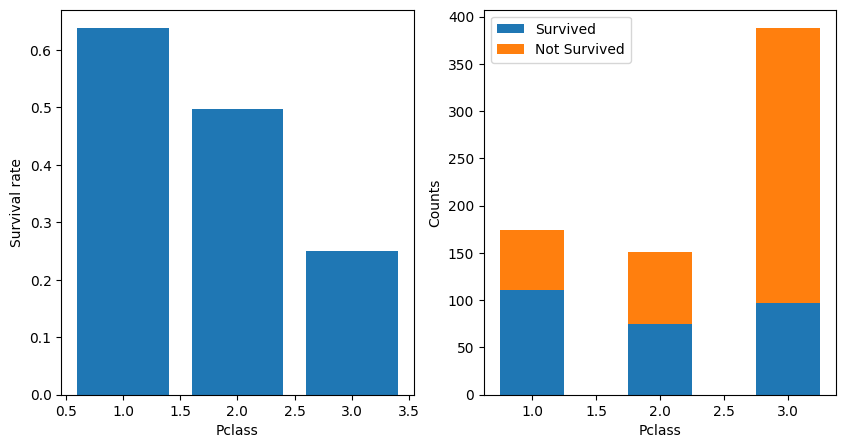

In [19]:
print(train.columns)
plot_survival('Pclass')

### **Question #3: How did being male or female affect survival rates?**

---

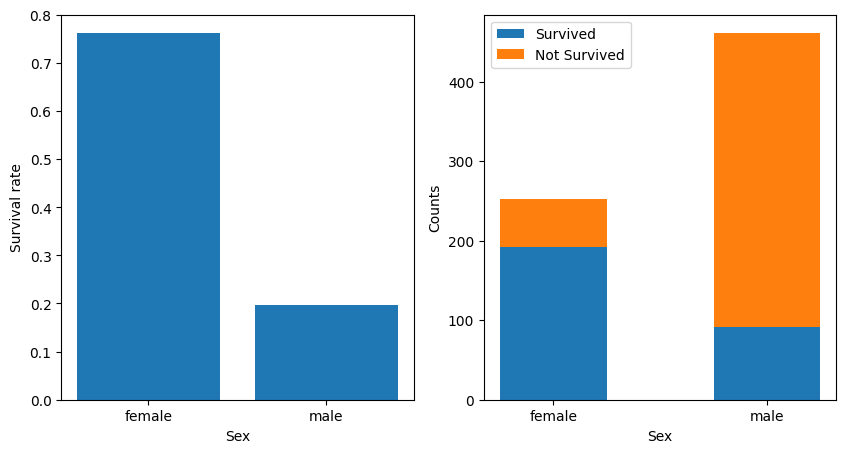

In [20]:
plot_survival('Sex')

### **Question #4: How did having family members onboard affect survival rates?**

---

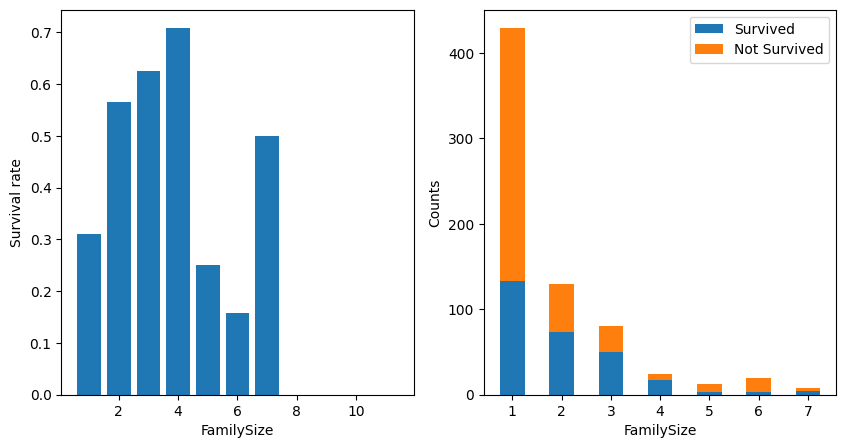

In [24]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
plot_survival('FamilySize')

### **Question #5: How did age group affect survival rates?**

---

<ipython-input-7-f47115d14767>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = train.groupby(column)['Survived'].mean()
<ipython-input-7-f47115d14767>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = train.groupby([column, 'Survived']).size().unstack()


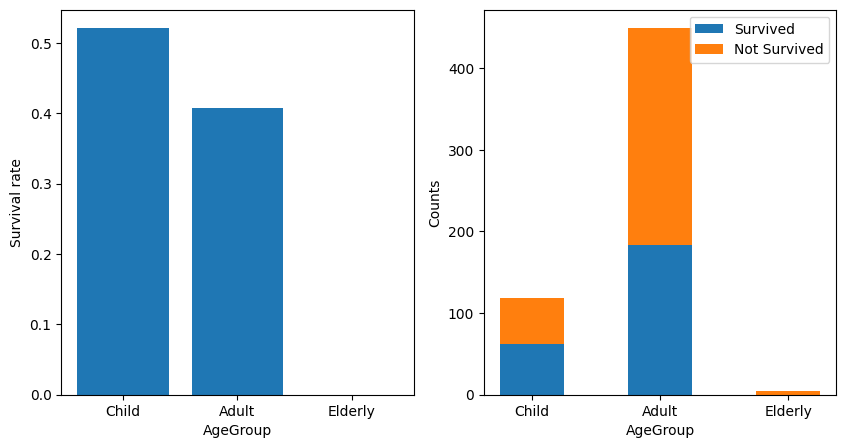

In [25]:
plot_survival('AgeGroup')

### **Question #6: How did fare group affect survival rates?**

---

<ipython-input-7-f47115d14767>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = train.groupby(column)['Survived'].mean()
<ipython-input-7-f47115d14767>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = train.groupby([column, 'Survived']).size().unstack()


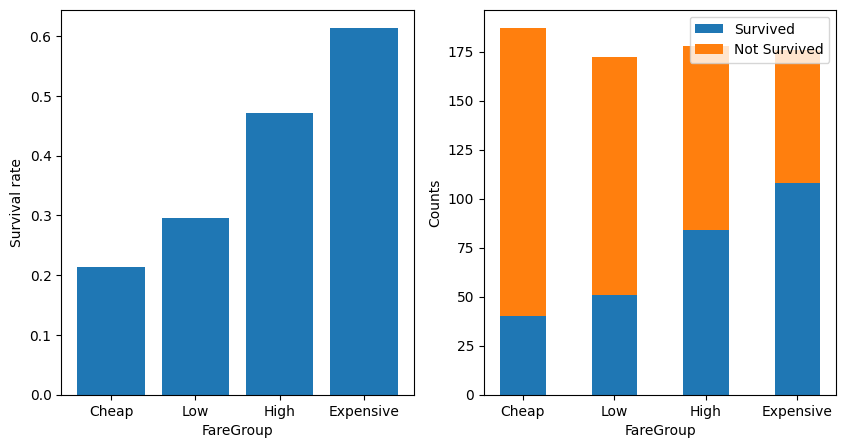

In [32]:
train['FareGroup'] = pd.qcut(train['Fare'], q=4, labels=['Cheap', 'Low', 'High', 'Expensive']) # Add this line to create FareGroup in train
plot_survival('FareGroup')

### **Question #7: How did the port of embarkation affect survival rates?**

---

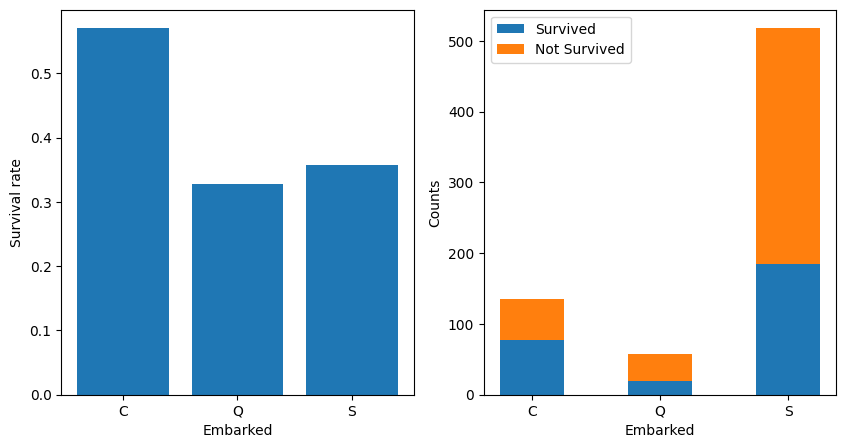

In [33]:
plot_survival('Embarked')

### **Question #8: What 3 features would be most useful for predicting survival?**

---

**Hint**: `SelectKBest(...)` would be helpful here.

**Run the code below to organize the data into numerical features and the label.**

In [44]:
features = train.select_dtypes('number')
features = features.drop('Survived', axis = 1)

label = train['Survived']

In [45]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from sklearn.impute import SimpleImputer

# ... (your existing code) ...

features = train.select_dtypes('number')
features = features.drop('Survived', axis=1)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')  # or strategy='median' if preferred
features_imputed = imputer.fit_transform(features)
features = pd.DataFrame(features_imputed, columns=features.columns, index=features.index)


label = train['Survived']

print(features.columns)
SelectKBest(chi2, k=3).fit_transform(features, label)


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize'], dtype='object')


array([[ 3.        ,  0.75      , 19.2583    ],
       [ 3.        , 34.5       ,  6.4375    ],
       [ 1.        , 38.        , 71.2833    ],
       ...,
       [ 3.        , 29.13293194, 69.55      ],
       [ 1.        , 29.13293194, 26.        ],
       [ 3.        , 29.13293194,  6.95      ]])

## **Wrapping Up**

Congratulations on completing a data science project! Not all data science projects include machine learning. Drawing insights from data through EDA, feature engineering, and visualizations is data science! In a later lab, you will continue your project with machine learning to make survival predictions for individual passengers.

#End of notebook
---
© 2023 The Coding School, All rights reserved